In [1]:
!pip install pandas
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('data/store_1_sales.csv')
data.head()

,Date,Item Code,Category,Quantity Sold,Price,Total Sale
0,2023-09-01 10:32:00,101.0,Электроника,2.0,30000.0,60000.0
1,2023-09-01 11:45:00,202.0,Одежда,1.0,5000.0,5000.0
2,2023-09-02 14:20:00,101.0,Электроника,1.0,30000.0,30000.0
3,2023-09-03 13:00:00,303.0,Продукты,10.0,200.0,2000.0
4,2023-09-03 16:50:00,404.0,Бытовая техника,1.0,15000.0,15000.0


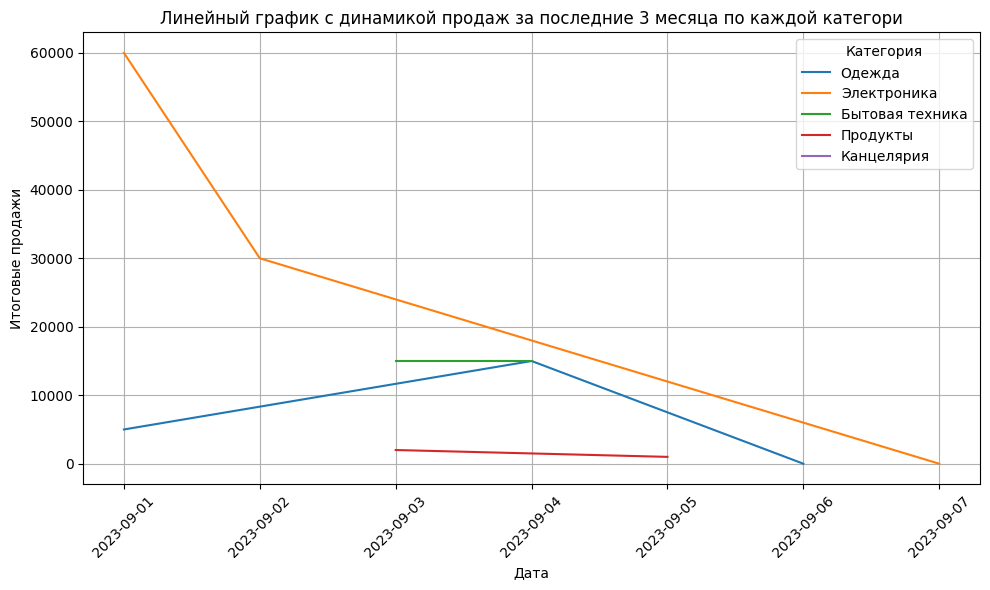

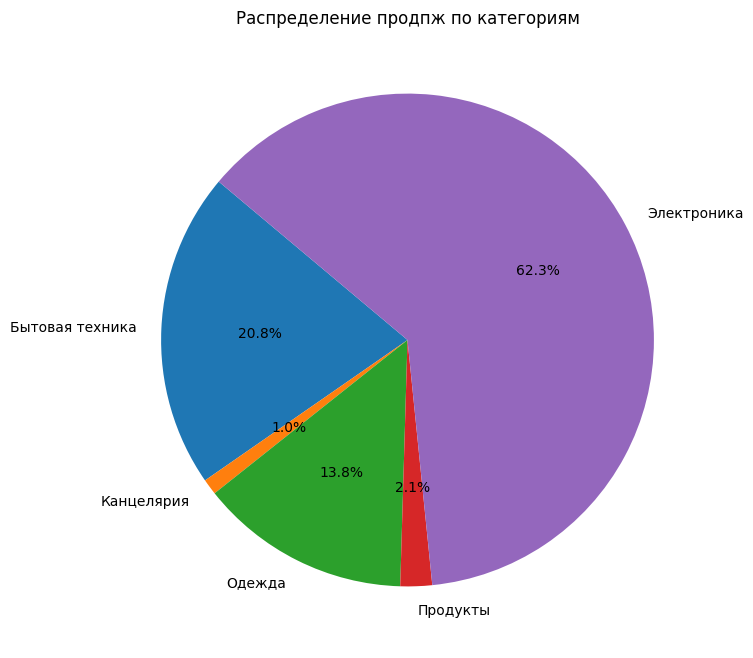

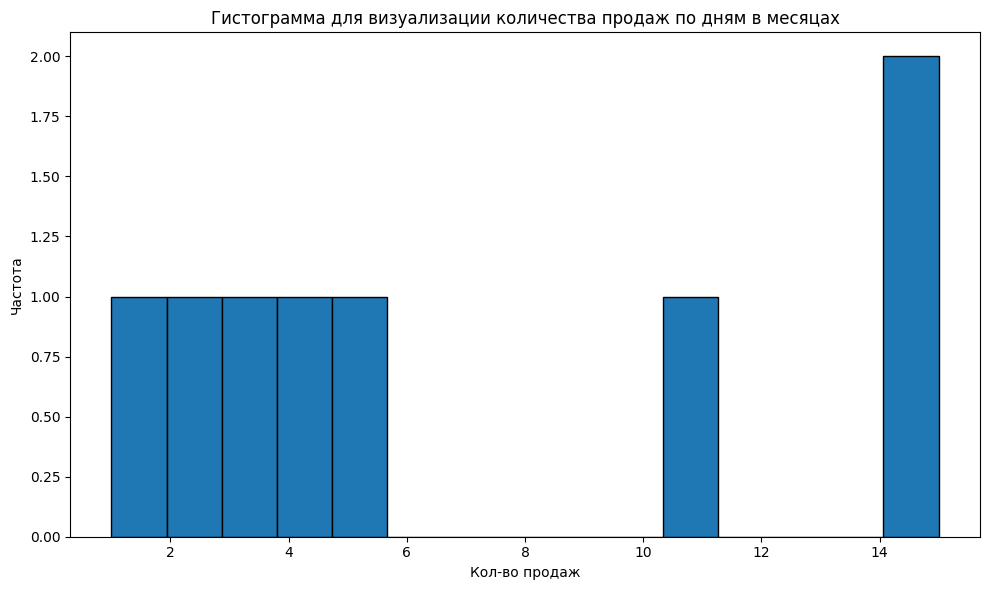

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('data/store_1_sales.csv')
data['Date'] = pd.to_datetime(data['Date'])
latest_date = data['Date'].max()
three_months_ago = latest_date - pd.DateOffset(months=3)
filtered_data = data[data['Date'] >= three_months_ago]
daily_sales = filtered_data.groupby([filtered_data['Date'].dt.date, 'Category']).sum(numeric_only=True).reset_index()

plt.figure(figsize=(10, 6))
for category in daily_sales['Category'].unique():
    category_data = daily_sales[daily_sales['Category'] == category]
    plt.plot(category_data['Date'], category_data['Total Sale'], label=category)
plt.xlabel('Дата')
plt.ylabel('Итоговые продажи')
plt.title('Линейный график с динамикой продаж за последние 3 месяца по каждой категори')
plt.legend(title="Категория")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig('result/sales_trends_last_3_months.png')
plt.show()

category_sales = filtered_data.groupby('Category')['Total Sale'].sum()
plt.figure(figsize=(8, 8))
plt.pie(category_sales, labels=category_sales.index, autopct='%1.1f%%', startangle=140)
plt.title('Распределение продпж по категориям')
plt.savefig('result/sales_distribution_by_category.png')
plt.show()

daily_sales_count = filtered_data.groupby(filtered_data['Date'].dt.date)['Quantity Sold'].sum()
plt.figure(figsize=(10, 6))
plt.hist(daily_sales_count, bins=15, edgecolor='black')
plt.xlabel('Кол-во продаж')
plt.ylabel('Частота')
plt.title('Гистограмма для визуализации количества продаж по дням в месяцах')
plt.tight_layout()
plt.savefig('result/daily_sales_histogram.png')
plt.show()
